### Packages

In [1]:
import numpy as np
import csv
import string
import collections
import random
import pandas as pd
import plotnine as p9
import json

### Functions

In [2]:
def load_data(file):
    X_raw = []
    y = []

    with open(file, 'rt', encoding='utf8') as f:
        dict_reader = csv.DictReader(f)

        for observation in dict_reader:
            y.append(observation['gross_profit'])
            observation.pop('gross_profit', None)

            for key in ['store', 'city', 'liter']:
                observation.pop(key, None)

            X_raw.append(observation)

    return X_raw, y

def convert_X_raw_to_array(X_raw):
    feature_keys = list(X_raw[0].keys())
    X = []

    for obs in X_raw:
        row = []

        for key in feature_keys:
            value = obs[key]
            row.append(value)

        X.append(row)

    return np.array(X)

def train_valid_test_split(X, y):
    random.seed(32)

    X_train = []
    X_valid = []
    X_test = []
    y_train = []
    y_valid = []
    y_test = []
   
    for index in range(len(X)):
        z = random.uniform(0, 1)

        if z < 0.7:
          X_train.append(X[index])
          y_train.append(y[index])

        elif z < 0.85:
            X_valid.append(X[index])
            y_valid.append(y[index])
            
        else:
            X_test.append(X[index])
            y_test.append(y[index])
                
    X_train = np.array(X_train, dtype=float)
    y_train = np.array(y_train, dtype=float)
    X_valid = np.array(X_valid, dtype=float)
    y_valid = np.array(y_valid, dtype=float)
    X_test = np.array(X_test, dtype=float)
    y_test = np.array(y_test, dtype=float)
    

    return X_train, X_valid, X_test, y_train, y_valid, y_test

def add_ones(X):
  beta_zero_column = np.ones((X.shape[0], 1))
  X_ones = np.hstack((beta_zero_column, X))

  return X_ones

def ols(X, y):
    X = X.astype(float)
    y = y.astype(float)

    # delete zero rows
    X = X[~np.all(X == 0, axis=1)]

    # delete zero columns
    X = X[:, ~np.all(X == 0, axis=0)]

    # ols
    Xt = X.transpose()
    Xt_X = np.dot(Xt, X)
    Xt_X_inv = np.linalg.pinv(Xt_X)
    Xt_X_inv_Xt = np.dot(Xt_X_inv, Xt)
    beta_hat = np.dot(Xt_X_inv_Xt, y)

    return beta_hat

def recenter(X, y):
    X = X - np.mean(X, 0)
    y = y - np.mean(y)

    return X, y

def ridge(X, y, fLambda):
    X = np.array(X)
    y = np.array(y)
    
    # delete zero rows
    # X = X[~np.all(X == 0, axis=1)]
    
    # # delete zero columns
    # X = X[:, ~np.all(X == 0, axis=0)]
    
    # ridge
    Xt = X.transpose()
    Xt_X = np.dot(Xt, X)
    lambda_I = fLambda * np.identity(X.shape[1])
    Xt_X_lambda_I_inv = np.linalg.inv(Xt_X + lambda_I)
    Xt_X_lambda_I_inv_Xt = np.dot(Xt_X_lambda_I_inv, Xt)
    beta_hat = np.dot(Xt_X_lambda_I_inv_Xt, y)

    return beta_hat

# new function to get the cols removed, got code from ols
def get_removed_col_indices(X):
    X = np.array(X)
    original_cols = np.arange(X.shape[1])
    non_zero_cols = ~np.all(X  == 0, axis=0)
    removed_cols = original_cols[~non_zero_cols]
    return removed_cols, original_cols

# new function to remove features
def remove_features(feat_list, removed_cols):
  return [feature for i, feature in enumerate(feat_list) if i not in removed_cols]

# prediction
def predict(X, beta):
  X = np.array(X)
  # X = X[:, ~np.all(X==0, axis=0)]
  beta = np.array(beta)
  y_hat = np.dot(X, beta)

  return y_hat

# calculate mse
def mean_squared_error(y_hat, y):
  mse = np.mean((y.flatten() - y_hat) ** 2)

  return mse

# Preparation

In [3]:
X_raw, y = load_data(file="data/iowa_algorithm.csv")
y

['4499.84',
 '4598.18',
 '4840.74',
 '3828.5499999999997',
 '4691.36',
 '2410.09',
 '3672.24',
 '2836.75',
 '2938.72',
 '2105.74',
 '1793.33',
 '3507.85',
 '486.98',
 '544.34',
 '831.8399999999999',
 '102.0',
 '294.0',
 '1563.8400000000001',
 '1202.16',
 '1525.2',
 '1256.16',
 '495.12',
 '984.6',
 '450.47999999999996',
 '877.8000000000002',
 '9494.44',
 '14529.210000000001',
 '19482.74',
 '17362.5',
 '13655.67',
 '21574.42',
 '14837.93',
 '16636.43',
 '19035.71',
 '14874.43',
 '17111.48',
 '22558.8',
 '9904.46',
 '7945.599999999999',
 '5346.0',
 '7236.8099999999995',
 '6814.63',
 '6366.48',
 '10028.69',
 '7121.5599999999995',
 '8110.29',
 '6354.69',
 '7392.8',
 '8375.86',
 '1025.14',
 '1092.56',
 '2010.66',
 '2292.18',
 '2352.6',
 '1737.84',
 '2580.4700000000003',
 '1977.49',
 '3923.7',
 '2645.84',
 '1638.03',
 '4271.68',
 '335.15999999999997',
 '341.52',
 '419.15',
 '440.2',
 '408.18',
 '427.25',
 '416.20000000000005',
 '355.28000000000003',
 '349.33000000000004',
 '410.04',
 '558.589

In [4]:
X_raw[0]

{'month': '1',
 's_convenience_store': '0',
 's_distillery_brewery': '0',
 's_gas_station': '0',
 's_general_store': '0',
 's_grocery_store': '0',
 's_liquor_store_bar': '1',
 's_other': '0',
 's_pharmacy': '0',
 's_unknown': '0',
 'c_adair': '0',
 'c_adams': '0',
 'c_allamakee': '0',
 'c_appanoose': '0',
 'c_audubon': '0',
 'c_benton': '0',
 'c_black hawk': '0',
 'c_boone': '0',
 'c_bremer': '0',
 'c_buchanan': '0',
 'c_buena vista': '0',
 'c_butler': '0',
 'c_calhoun': '0',
 'c_carroll': '0',
 'c_cass': '0',
 'c_cedar': '0',
 'c_cerro gordo': '0',
 'c_cherokee': '0',
 'c_chickasaw': '0',
 'c_clarke': '0',
 'c_clay': '0',
 'c_clayton': '0',
 'c_clinton': '0',
 'c_crawford': '0',
 'c_dallas': '0',
 'c_davis': '0',
 'c_decatur': '0',
 'c_delaware': '0',
 'c_des moines': '0',
 'c_dickinson': '0',
 'c_dubuque': '0',
 'c_emmet': '0',
 'c_fayette': '0',
 'c_floyd': '0',
 'c_franklin': '0',
 'c_fremont': '0',
 'c_greene': '0',
 'c_grundy': '0',
 'c_guthrie': '0',
 'c_hamilton': '0',
 'c_hanc

In [5]:
X = convert_X_raw_to_array(X_raw)

In [6]:
X.shape

(23095, 153)

In [7]:
X_train, X_valid, X_test, y_train, y_valid, y_test = train_valid_test_split(X, y)

In [8]:
print(X_train.shape)
print(y_train.shape[0])

(16137, 153)
16137


In [9]:
print(X_test.shape)
print(y_test.shape[0])

(3421, 153)
3421


In [10]:
print(X_valid.shape)
print(y_valid.shape[0])

(3537, 153)
3537


# Redge Regression

In [11]:
df = pd.read_csv('data/iowa_algorithm.csv')
df['gross_profit'].describe()

count     23095.000000
mean       6462.534688
std       17846.468086
min          10.750000
25%        1329.800000
50%        2424.220000
75%        5501.125000
max      499690.940000
Name: gross_profit, dtype: float64

## 1. Training Data

In [13]:
X_train, y_train = recenter(X_train, y_train)
beta_hat_1 = ridge(X_train, y_train, fLambda=1)
feat_list = list(X_raw[0].keys())
feat = np.array(feat_list)
beta_hat_1_labeled = np.column_stack((feat, beta_hat_1))
beta_hat_1_labeled_dict = {str(row[0]): float(row[1]) for row in beta_hat_1_labeled}

with open('table/beta_hat_1_labeled.json', 'w') as f:
    json.dump(beta_hat_1_labeled_dict, f, indent=2)

y_hat_train = predict(X_train, beta_hat_1)
mse_train = mean_squared_error(y_hat_train, y_train)
rmse_train = np.sqrt(mse_train)
print('MSE in sample:', mse_train)
print('RMSE in sample:', rmse_train)

MSE in sample: 69629568.6087363
RMSE in sample: 8344.43339051468


## 2. Validation

In [14]:
X_valid, y_valid = recenter(X_valid, y_valid)
y_hat_valid = predict(X_valid, beta_hat_1)

mse_valid = mean_squared_error(y_hat_valid, y_valid)
rmse_valid = np.sqrt(mse_valid)
print('MSE in sample:', mse_valid)
print('RMSE in sample:', rmse_valid)

MSE in sample: 70491921.35360922
RMSE in sample: 8395.946721699062


In [15]:
rmse_list = []
lambda_range = np.logspace(-1, 3, num=50)

for lam in lambda_range:
    beta_hat = ridge(X_train, y_train, lam)
    y_hat = predict(X_valid, beta_hat)
    mse = mean_squared_error(y_valid, y_hat)
    rmse = np.sqrt(mse)
    rmse_list.append(rmse)
    print(f"λ={lam:.4f}, RMSE: {rmse:.4f}")

λ=0.1000, RMSE: 8396.1565
λ=0.1207, RMSE: 8396.1513
λ=0.1456, RMSE: 8396.1451
λ=0.1758, RMSE: 8396.1376
λ=0.2121, RMSE: 8396.1286
λ=0.2560, RMSE: 8396.1178
λ=0.3089, RMSE: 8396.1049
λ=0.3728, RMSE: 8396.0895
λ=0.4498, RMSE: 8396.0711
λ=0.5429, RMSE: 8396.0492
λ=0.6551, RMSE: 8396.0233
λ=0.7906, RMSE: 8395.9927
λ=0.9541, RMSE: 8395.9567
λ=1.1514, RMSE: 8395.9145
λ=1.3895, RMSE: 8395.8656
λ=1.6768, RMSE: 8395.8092
λ=2.0236, RMSE: 8395.7450
λ=2.4421, RMSE: 8395.6728
λ=2.9471, RMSE: 8395.5930
λ=3.5565, RMSE: 8395.5066
λ=4.2919, RMSE: 8395.4161
λ=5.1795, RMSE: 8395.3252
λ=6.2506, RMSE: 8395.2396
λ=7.5431, RMSE: 8395.1679
λ=9.1030, RMSE: 8395.1219
λ=10.9854, RMSE: 8395.1172
λ=13.2571, RMSE: 8395.1742
λ=15.9986, RMSE: 8395.3183
λ=19.3070, RMSE: 8395.5805
λ=23.2995, RMSE: 8395.9971
λ=28.1177, RMSE: 8396.6099
λ=33.9322, RMSE: 8397.4654
λ=40.9492, RMSE: 8398.6139
λ=49.4171, RMSE: 8400.1091
λ=59.6362, RMSE: 8402.0076
λ=71.9686, RMSE: 8404.3686
λ=86.8511, RMSE: 8407.2553
λ=104.8113, RMSE: 8410.736

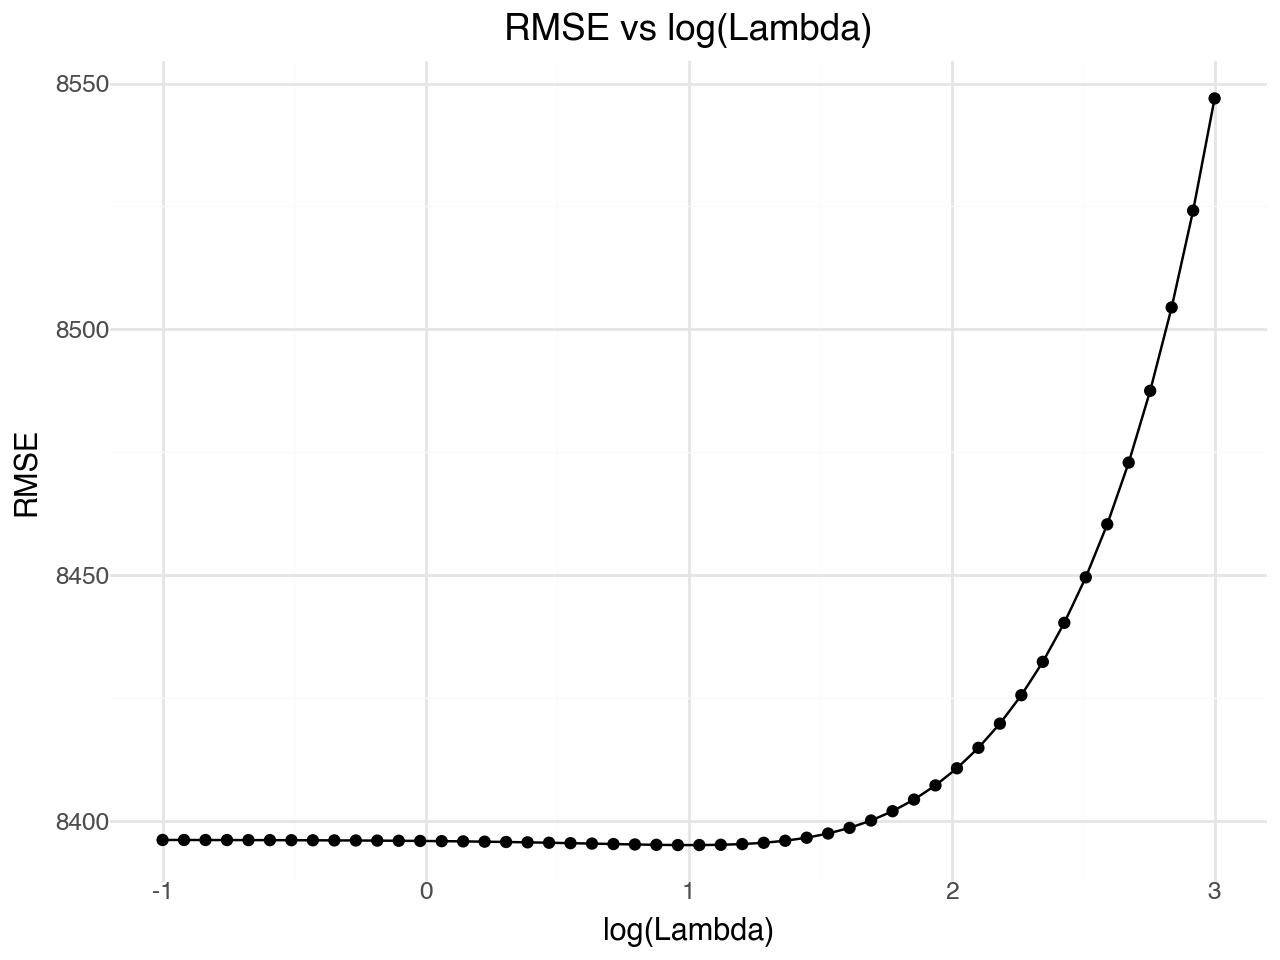

In [30]:
df_rmse_ridge = pd.DataFrame({
    'lambda': lambda_range,
    'log_lambda': np.log10(lambda_range),
    'rmse': rmse_list
})

df_rmse_ridge.to_csv('table/rmse_ridge.csv', index=False)

plot = (
    p9.ggplot(df_rmse, p9.aes(x='log_lambda', y='rmse'))
    + p9.geom_line()
    + p9.geom_point(size=1.5)
    + p9.labs(
        title='RMSE vs log(Lambda)',
        x='log(Lambda)',
        y='RMSE'
    )
    + p9.theme_minimal()
)

plot

In [20]:
df_rmse.loc[df_rmse['rmse'].idxmin()]

lambda          10.985411
log_lambda       1.040816
rmse          8395.117188
Name: 25, dtype: float64

## 3. Testing Data

In [31]:
X_test, y_test = recenter(X_test, y_test)
beta_hat_test = ridge(X_train, y_train, fLambda=11)

feat_list = list(X_raw[0].keys())
feat = np.array(feat_list)
beta_hat_test_labeled = np.column_stack((feat, beta_hat_test))
df_beta_hat = pd.DataFrame(beta_hat_test_labeled, columns=["feat", "coef"])
df_beta_hat.to_csv("table/beta_hat_test_labeled.csv", index=False)


y_hat_test = predict(X_test, beta_hat_test)
mse_test = mean_squared_error(y_hat_test, y_test)
rmse_test = np.sqrt(mse_test)
print('MSE in sample:', mse_test)
print('RMSE in sample:', rmse_test)

MSE in sample: 68805659.36462541
RMSE in sample: 8294.917682811893


In [24]:
len(y_hat_test)

3421

In [26]:
len(y_test)

3421

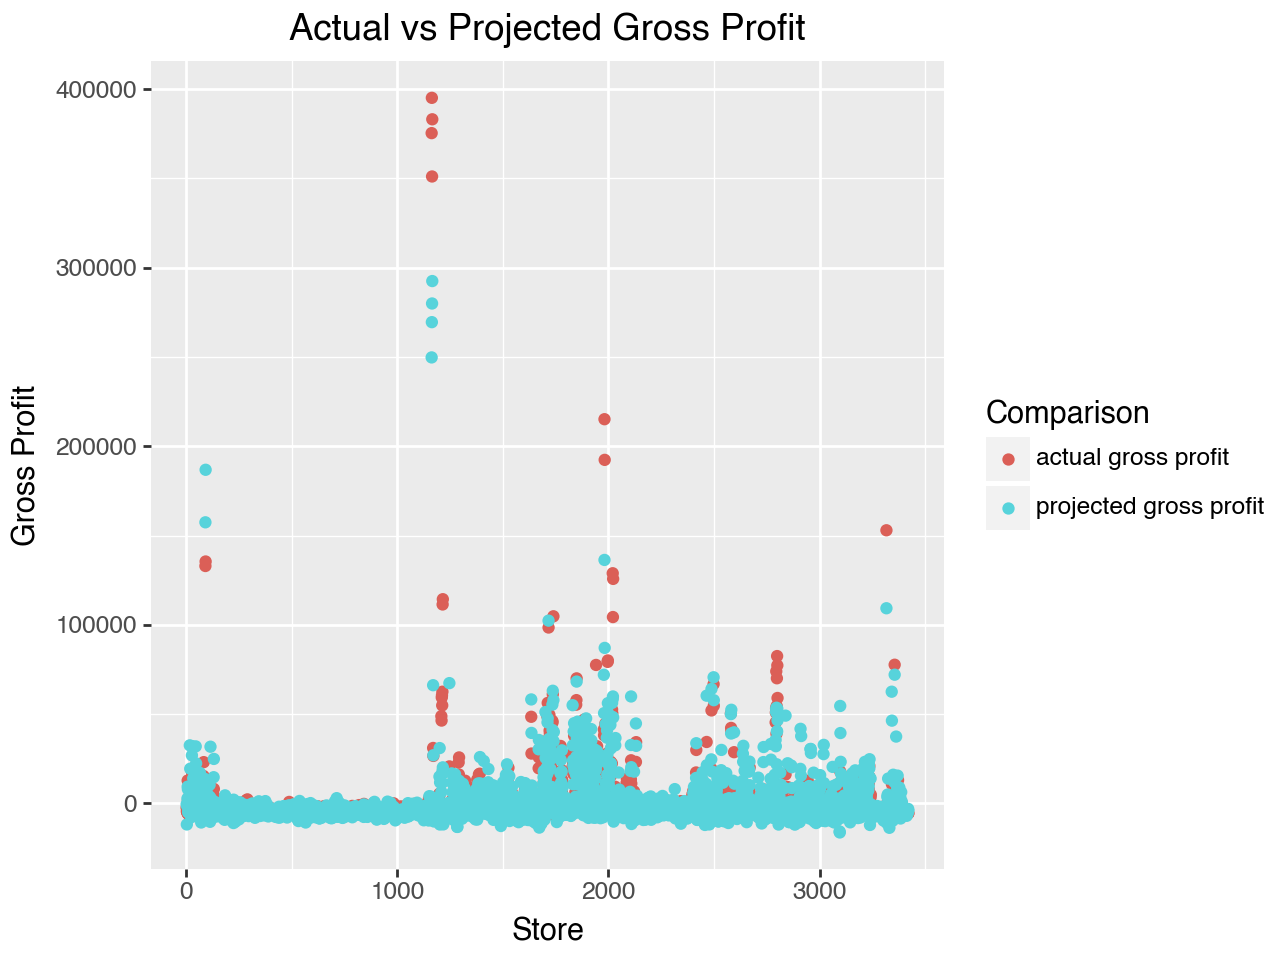

In [28]:
df_diff = pd.DataFrame({
    'store': range(1, 3422),
    'actual gross profit': list(y_test),
    'projected gross profit': list(y_hat_test),
})

df_diff_long = pd.melt(
    df_diff,
    id_vars='store',
    var_name='comparison',
    value_name='gross_profit'
)

df_diff_long.to_csv('table/diff_actu_predi_ridge.csv', index=False)

plot = (
    p9.ggplot(df_diff_long, p9.aes(x='store', y='gross_profit', color='comparison')) +
    p9.geom_point() +
    p9.labs(title='Actual vs Projected Gross Profit',
            x='Store',
            y='Gross Profit',
            color='Comparison')
)
plot